In [1]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import folium
import seaborn as sns
import requests

In [2]:
Construction_Sites =pd.read_csv(r"C:\Users\GARY\Desktop\Temp\Capstone_Project_Data\Development_Activity_Monitor.csv")
Cafes = pd.read_csv(r"C:\Users\GARY\Desktop\Temp\Capstone_Project_Data\Book1.csv")
Construction_Sites.head()
Cafes.head()

,Census year,Block ID,Property ID,Base property ID,Street address,CLUE small area,Trading name,Industry (ANZSIC4) code,Industry (ANZSIC4) description,Seating type,Number of seats,x coordinate,y coordinate
0,2002,64,104665,104665,68-78 Hardware Lane,Melbourne (CBD),The Coffee Cup,4511,Cafes and Restaurants,Seats - Outdoor,22,144.961106,-37.813070
1,2002,64,104669,104669,54-58 Hardware Lane,Melbourne (CBD),Cafe Max,4511,Cafes and Restaurants,Seats - Indoor,90,144.961262,-37.813395
2,2002,64,104669,104669,54-58 Hardware Lane,Melbourne (CBD),Cafe Max,4511,Cafes and Restaurants,Seats - Outdoor,30,144.961262,-37.813395
3,2002,64,105870,105870,380-384 Little Bourke Street,Melbourne (CBD),Saquella Caffe,4512,Takeaway Food Services,Seats - Indoor,20,144.961328,-37.813543
4,2002,64,105869,105869,388-392 Little Bourke Street,Melbourne (CBD),Ciao Pizza Napoli,4511,Cafes and Restaurants,Seats - Indoor,65,144.961073,-37.813598


Text(0.5, 1.0, 'Melbourne - Construction Sites')

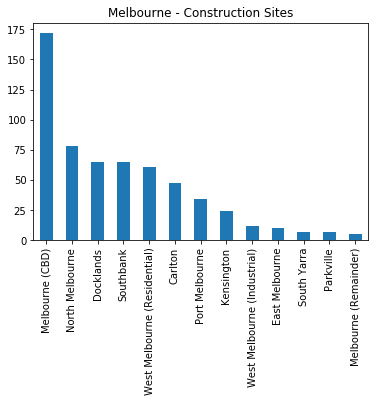

In [14]:
Construction_Sites.head()
Construction_Sites_Filtered=Construction_Sites.loc[(Construction_Sites['status']!='COMPLETED')]
ax10=Construction_Sites_Filtered['clue_small_area'].value_counts().plot(kind='bar')
ax10.set_title("Melbourne - Construction Sites")

In [4]:
Construction_Sites_Filtered=Construction_Sites_Filtered[['development_key', 'status','clue_small_area','street_address','longitude', 'latitude','Location 1']]

In [5]:
Construction_Sites_Filtered.head()

,development_key,status,clue_small_area,street_address,longitude,latitude,Location 1
891,X001232,APPLIED,Melbourne (CBD),150-162 Flinders Street MELBOURNE VIC 3000,144.969387,-37.816486,POINT (144.9693865 -37.8164856)
892,X000307,APPLIED,Melbourne (CBD),110-112 Franklin Street MELBOURNE VIC 3000,144.959156,-37.808104,POINT (144.9591563 -37.80810375)
893,X000823,APPLIED,Port Melbourne,850-868 Lorimer Street PORT MELBOURNE VIC 3207,144.934676,-37.823050,POINT (144.9346765 -37.82304993)
894,X000824,APPLIED,Port Melbourne,850-868 Lorimer Street PORT MELBOURNE VIC 3207,144.934676,-37.823050,POINT (144.9346765 -37.82304993)
895,X000825,APPLIED,Port Melbourne,850-868 Lorimer Street PORT MELBOURNE VIC 3207,144.934676,-37.823050,POINT (144.9346765 -37.82304993)


In [6]:
address = 'Melbourne, VIC'

geolocator = Nominatim(user_agent="Melbourne_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geographical co-ordinate of Melbourne are {}, {}'.format(latitude,longitude))

The geographical co-ordinate of Melbourne are -37.8142176, 144.9631608


In [7]:
map_melbourne=folium.Map(location=[latitude,longitude],zoom_start=10)

for lat, lng, development, status in zip(Construction_Sites_Filtered['latitude'],Construction_Sites_Filtered['longitude'],Construction_Sites_Filtered['development_key'],Construction_Sites_Filtered['status']):
    if status =='APPROVED':
        clr = 'grey',
    elif status == 'APPLIED':
        clr = 'grey',
    else:        
        clr = 'green',
    
    label ='{} & {}'.format(development,status)
    label = folium.Popup(label,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color=clr,
    fill=True,
    fill_color=clr,
    fill_opacity=0.7,
    parse_html=False).add_to(map_melbourne)

    
map_melbourne

In [8]:
Construction_Sites_Filtered.groupby('clue_small_area')['status'].count()

clue_small_area
Carlton                          47
Docklands                        65
East Melbourne                   10
Kensington                       24
Melbourne (CBD)                 172
Melbourne (Remainder)             5
North Melbourne                  78
Parkville                         7
Port Melbourne                   34
South Yarra                       7
Southbank                        65
West Melbourne (Industrial)      12
West Melbourne (Residential)     61
Name: status, dtype: int64

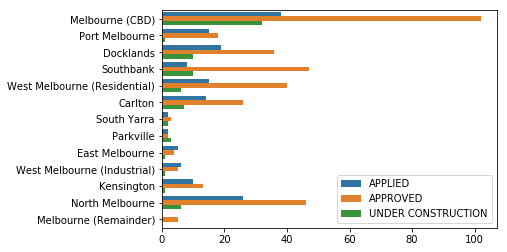

In [9]:
ax=sns.countplot(y="clue_small_area",hue='status',data=Construction_Sites_Filtered)
ax.set_ylabel("")
ax.set_xlabel("")
ax.legend(loc='lower right')

In [10]:
Construction_Sites_Active=Construction_Sites_Filtered.loc[Construction_Sites_Filtered['status'] == 'UNDER CONSTRUCTION']

In [11]:
Construction_Sites_Active.shape

(80, 7)

In [68]:
from pandas.io.json import json_normalize
CLIENT_ID = 'HUAISJ1KURJOH4AV0UAF5LETXTEZXAFVXXL5D34LAULAOLK5' # your Foursquare ID
CLIENT_SECRET = 'RH122EVRX1M0LY5I5OU0U0UDUZGC2NQ3T5VEEUVOAWQDO2FE' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HUAISJ1KURJOH4AV0UAF5LETXTEZXAFVXXL5D34LAULAOLK5
CLIENT_SECRET:RH122EVRX1M0LY5I5OU0U0UDUZGC2NQ3T5VEEUVOAWQDO2FE


In [69]:
Cafes = pd.DataFrame()
for adr, lat, lng in zip(Construction_Sites_Active['street_address'],Construction_Sites_Active['latitude'],Construction_Sites_Active['longitude']):
        search_query = 'Coffee'
        radius = 100  
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, search_query, radius, LIMIT)
        results = requests.get(url).json()
        venues = results['response']['venues']
        dataframe = json_normalize(venues)
        Cafes=Cafes.append(dataframe, ignore_index=True)       

C:\Users\GARY\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [74]:
Cafes.to_csv(r"C:\Users\GARY\Desktop\Temp\Capstone_Project_Data\Cafes_Active.csv")

In [76]:
map_melbourne=folium.Map(location=[latitude,longitude],zoom_start=10)

for lat, lng, development in zip(Cafes['location.lat'],Cafes['location.lng'],Cafes['name']):
    label ='{}'.format(development)
    label = folium.Popup(label,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='blue',
    fill_opacity=0.7,
    parse_html=False).add_to(map_melbourne)


for lat, lng, development in zip(Construction_Sites_Active['latitude'],Construction_Sites_Active['longitude'],Construction_Sites_Active['development_key']):
    label ='{}'.format(development)
    label = folium.Popup(label,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='red',
    fill=True,
    fill_color='red',
    fill_opacity=0.7,
    parse_html=False).add_to(map_melbourne)
    
map_melbourne

In [12]:
Cafes2=pd.read_csv(r"C:\Users\GARY\Desktop\Temp\Capstone_Project_Data\Book1.csv")
array=['Cafes and Restaurants','Takeaway Food Services']
Cafes2=Cafes2.loc[(Cafes2['Census year'] == 2016) & \
                (Cafes2['Industry (ANZSIC4) description'].isin(array))]
Cafes2.head()

,Census year,Block ID,Property ID,Base property ID,Street address,CLUE small area,Trading name,Industry (ANZSIC4) code,Industry (ANZSIC4) description,Seating type,Number of seats,x coordinate,y coordinate
1681,2016,258,568077,568077,179-201 Pelham Street,Carlton,Porta Via,4511,Cafes and Restaurants,Seats - Outdoor,40,144.960034,-37.802410
1682,2016,240,101052,101052,212 Berkeley Street,Carlton,Haymarket Place,4511,Cafes and Restaurants,Seats - Indoor,47,144.958999,-37.800525
1683,2016,240,101052,101052,212 Berkeley Street,Carlton,Haymarket Place,4511,Cafes and Restaurants,Seats - Outdoor,10,144.958999,-37.800525
1684,2016,259,101059,101059,122-128 Berkeley Street,Carlton,Middle Fish,4511,Cafes and Restaurants,Seats - Indoor,60,144.959001,-37.802577
1685,2016,216,102723,102723,310-312 Drummond Street,Carlton,The Town Mouse,4511,Cafes and Restaurants,Seats - Indoor,40,144.969121,-37.798538


Text(0.5, 0, '')

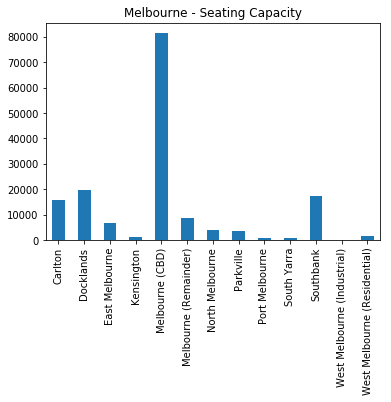

In [15]:
ax3 = Cafes2.groupby('CLUE small area')['Number of seats'].sum().plot(kind='bar')
ax3.set_title('Melbourne - Seating Capacity')
ax3.set_xlabel("")